# BLAST Search for EBOV RdRp Templates

In [1]:
from Bio.Blast import NCBIWWW

In [19]:
sequence_data = open("EBOVRdRp.fasta.rtf").read()
sequence_data

"{\\rtf1\\ansi\\ansicpg1252\\cocoartf2513\n\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\fmodern\\fcharset0 Courier;}\n{\\colortbl;\\red255\\green255\\blue255;\\red0\\green0\\blue0;\\red255\\green255\\blue255;}\n{\\*\\expandedcolortbl;;\\cssrgb\\c0\\c0\\c0;\\cssrgb\\c100000\\c100000\\c100000;}\n\\margl1440\\margr1440\\vieww10800\\viewh8400\\viewkind0\n\\deftab720\n\\pard\\pardeftab720\\partightenfactor0\n\n\\f0\\fs26 \\cf2 \\cb3 \\expnd0\\expndtw0\\kerning0\n\\outl0\\strokewidth0 \\strokec2 >sp|Q05318.2|L_EBOZM RecName: Full=RNA-directed RNA polymerase L; Short=Protein L; AltName: Full=Large structural protein; AltName: Full=Replicase; AltName: Full=Transcriptase; Includes: RecName: Full=RNA-directed RNA polymerase; Includes: RecName: Full=GTP phosphohydrolase; Includes: RecName: Full=GDP polyribonucleotidyltransferase; AltName: Full=PRNTase; Includes: RecName: Full=mRNA cap methyltransferase; AltName: Full=mRNA (guanine-N(7)-)-methyltransferase; Short=G-N7-MTase; AltName: Full=mR

In [20]:
result_handle = NCBIWWW.qblast("blastp", "pdb", sequence_data)
result_handle

In [21]:
with open('EBOVresults.xml', 'w') as save_file: 
    blast_results = result_handle.read()
    save_file.write(blast_results)

# Homology Structure Modeling of EBOV RdRp

In [23]:
import numpy
import matplotlib

In [15]:
conda config --add channels salilab


Note: you may need to restart the kernel to use updated packages.


In [16]:
conda install modeller

Solving environment: done

## Package Plan ##

  environment location: /Users/elizabethsun/opt/anaconda3

  added / updated specs:
    - modeller


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38hecd8cb5_0         2.9 MB
    hdf5-1106-1.10.6           |                0         2.8 MB  salilab
    modeller-10.1              |           py38_1        28.9 MB  salilab
    ------------------------------------------------------------
                                           Total:        34.5 MB

The following NEW packages will be INSTALLED:

  hdf5-1106          salilab/osx-64::hdf5-1106-1.10.6-0
  modeller           salilab/osx-64::modeller-10.1-py38_1

The following packages will be UPDATED:

  conda                               4.10.1-py38hecd8cb5_1 --> 4.10.3-py38hecd8cb5_0



hdf5-1106-1.10.6     | 2.8 MB    | #####################################

#For the next part of the code, I am planning on conducting homology structure modeling using the modeller package and code from https://github.com/giribio/ModellerNotebooks which I found through searching GitHub. It includes instructions on how to do template selection, model building, model evaluation, and template evaluation.

In [17]:
#Downloads the latest PDB sequence database in PIR file format
!curl https://salilab.org/modeller/downloads/pdb_95.pir.gz -o pdb_95.pir.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.2M  100 16.2M    0     0  15.4M      0  0:00:01  0:00:01 --:--:-- 15.4M


In [18]:
#Unzips the above file
!gunzip pdb_95.pir.gz

In [24]:
from modeller import *

log.verbose()
env = environ()

#Reads in the above PDB sequence database
sdb = sequence_db(env)
sdb.read(seq_database_file='pdb_95.pir', seq_database_format='PIR',
         chains_list='ALL', minmax_db_seq_len=(30, 4000), clean_sequences=True)

#Writes the sequence database in binary form
sdb.write(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
          chains_list='ALL')

#Reads in the binary database
sdb.read(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
         chains_list='ALL')

#Reads the target sequence/alignment in .ali format
aln = alignment(env)
aln.append(file='EBOVRdRp.ali.rtf', alignment_format='PIR', align_codes='ALL')

#Converts the input sequence/alignment into profile format
prf = aln.to_profile()

#Scans sequence database to pick up homologous sequences
prf.build(sdb, matrix_offset=-450, rr_file='${LIB}/blosum62.sim.mat',
          gap_penalties_1d=(-500, -50), n_prof_iterations=1,
          check_profile=False, max_aln_evalue=0.01)

#Writes out the profile in text format
prf.write(file='build_profile.prf', profile_format='TEXT')

#Converts the profile back to alignment format
aln = prf.to_alignment()

#Writes out the alignment file
aln.write(file='build_profile.ali', alignment_format='PIR')

NameError: name 'log' is not defined

In [26]:
pip install ssbio

     |████████████████████████████████| 222 kB 101 kB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 194 kB/s eta 0:00:01
     |████████████████████████████████| 202 kB 345 kB/s eta 0:00:01
     |████████████████████████████████| 138 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 73 kB/s eta 0:00:011
     |████████████████████████████████| 85 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 44 kB 160 kB/s eta 0:00:01
     |████████████████████████████████| 264 kB 131 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 294 kB/s eta 0:00:01
     |████████████████████████████████| 214 kB 3.3 MB/s eta 0:00:01     |███████████████████████████▌    | 184 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 841 kB 742 kB/s eta 0:00:0101
     |████████████████████████████████| 2.6 MB 112 kB/s eta 0:00:01
     |████████████████████████████████| 109 kB 385 kB/s eta 0:00:01
     |████████████████████████████████| 83 kB 3.5

In [37]:
import Bio.Alphabet

ImportError: Bio.Alphabet has been removed from Biopython. In many cases, the alphabet can simply be ignored and removed from scripts. In a few cases, you may need to specify the ``molecule_type`` as an annotation on a SeqRecord for your script to work correctly. Please see https://biopython.org/wiki/Alphabet for more information.

In [27]:
import sys 
import logging

In [38]:
#Imports the Protein class 
import ssbio.core.protein

ImportError: Bio.Alphabet has been removed from Biopython. In many cases, the alphabet can simply be ignored and removed from scripts. In a few cases, you may need to specify the ``molecule_type`` as an annotation on a SeqRecord for your script to work correctly. Please see https://biopython.org/wiki/Alphabet for more information.

In [36]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [32]:
handler = logging.StreamHandler(sys.stderr)
formatter = logging.Formatter('[%(asctime)s] [%(name)s] %(levelname)s: %(message)s', datefmt="%Y-%m-%d %H:%M")
handler.setFormatter(formatter)
logger.handlers = [handler]

In [33]:
import tempfile 
ROOT_DIR = tempfile.gettempdir()
PROTEIN_ID = 'Q05318.2'
PROTEIN_SEQ = 'MATQHTQYPDARLSSPIVLDQCDLVTRACGLYSSYSLNPQLRNCKLPKHIYRLKYDVTVTKFLSDVPVATLPIDFIVPVLLKALSGNGFCPVEPRCQQFLDEIIKYTMQDALFLKYYLKNVGAQEDCVDEHFQEKILSSIQGNEFLHQMFFWYDLAILTRRGRLNRGNSRSTWFVHDDLIDILGYGDYVFWKIPISMLPLNTQGIPHAAMDWYQASVFKEAVQGHTHIVSVSTADVLIMCKDLITCRFNTTLISKIAEIEDPVCSDYPNFKIVSMLYQSGDYLLSILGSDGYKIIKFLEPLCLAKIQLCSKYTERKGRFLTQMHLAVNHTLEEITEMRALKPSQAQKIREFHRTLIRLEMTPQQLCELFSIQKHWGHPVLHSETAIQKVKKHATVLKALRPIVIFETYCVFKYSIAKHYFDSQGSWYSVTSDRNLTPGLNSYIKRNQFPPLPMIKELLWEFYHLDHPPLFSTKIISDLSIFIKDRATAVERTCWDAVFEPNVLGYNPPHKFSTKRVPEQFLEQENFSIENVLSYAQKLEYLLPQYRNFSFSLKEKELNVGRTFGKLPYPTRNVQTLCEALLADGLAKAFPSNMMVVTEREQKESLLHQASWHHTSDDFGEHATVRGSSFVTDLEKYNLAFRYEFTAPFIEYCNRCYGVKNVFNWMHYTIPQCYMHVSDYYNPPHNLTLENRDNPPEGPSSYRGHMGGIEGLQQKLWTSISCAQISLVEIKTGFKLRSAVMGDNQCITVLSVFPLETDADEQEQSAEDNAARVAASLAKVTSACGIFLKPDETFVHSGFIYFGKKQYLNGVQLPQSLKTATRMAPLSDAIFDDLQGTLASIGTAFERSISETRHIFPCRITAAFHTFFSVRILQYHHLGFNKGFDLGQLTLGKPLDFGTISLALAVPQVLGGLSFLNPEKCFYRNLGDPVTSGLFQLKTYLRMIEMDDLFLPLIAKNPGNCTAIDFVLNPSGLNVPGSQDLTSFLRQIVRRTITLSAKNKLINTLFHASADFEDEMVCKWLLSSTPVMSRFAADIFSRTPSGKRLQILGYLEGTRTLLASKIINNNTETPVLDRLRKITLQRWSLWFSYLDHCDNILAEALTQITCTVDLAQILREYSWAHILEGRPLIGATLPCMIEQFKVFWLKPYEQCPQCSNAKQPGGKPFVSVAVKKHIVSAWPNASRISWTIGDGIPYIGSRTEDKIGQPAIKPKCPSAALREAIELASRLTWVTQGSSNSDLLIKPFLEARVNLSVQEILQMTPSHYSGNIVHRYNDQYSPHSFMANRMSNSATRLIVSTNTLGEFSGGGQSARDSNIIFQNVINYAVALFDIKFRNTEATDIQYNRAHLHLTKCCTREVPAQYLTYTSTLDLDLTRYRENELIYDSNPLKGGLNCNISFDNPFFQGKRLNIIEDDLIRLPHLSGWELAKTIMQSIISDSNNSSTDPISSGETRSFTTHFLTYPKIGLLYSFGAFVSYYLGNTILRTKKLTLDNFLYYLTTQIHNLPHRSLRILKPTFKHASVMSRLMSIDPHFSIYIGGAAGDRGLSDAARLFLRTSISSFLTFVKEWIINRGTIVPLWIVYPLEGQNPTPVNNFLYQIVELLVHDSSRQQAFKTTISDHVHPHDNLVYTCKSTASNFFHASLAYWRSRHRNSNRKYLARDSSTGSSTNNSDGHIERSQEQTTRDPHDGTERNLVLQMSHEIKRTTIPQENTHQGPSFQSFLSDSACGTANPKLNFDRSRHNVKFQDHNSASKREGHQIISHRLVLPFFTLSQGTRQLTSSNESQTQDEISKYLRQLRSVIDTTVYCRFTGIVSSMHYKLDEVLWEIESFKSAVTLAEGEGAGALLLIQKYQVKTLFFNTLATESSIESEIVSGMTTPRMLLPVMSKFHNDQIEIILNNSASQITDITNPTWFKDQRARLPKQVEVITMDAETTENINRSKLYEAVYKLILHHIDPSVLKAVVLKVFLSDTEGMLWLNDNLAPFFATGYLIKPITSSARSSEWYLCLTNFLSTTRKMPHQNHLSCKQVILTALQLQIQRSPYWLSHLTQYADCELHLSYIRLGFPSLEKVLYHRYNLVDSKRGPLVSITQHLAHLRAEIRELTNDYNQQRQSRTQTYHFIRTAKGRITKLVNDYLKFFLIVQALKHNGTWQAEFKKLPELISVCNRFYHIRDCNCEERFLVQTLYLHRMQDSEVKLIERLTGLLSLFPDGLYRFD'

In [34]:
my_protein = Protein(ident=PROTEIN_ID, root_dir=ROOT_DIR, pdb_file_type='mmtf')

NameError: name 'Protein' is not defined

In [35]:
my_protein.load_manual_sequence(seq=PROTEIN_SEQ, ident='WT', write_fasta_file=True, set_as_representative=True)

NameError: name 'my_protein' is not defined

In [ ]:
#Mapping using BLAST
my_protein.blast_representative_sequence_to_pdb(seq_ident_cutoff=0.9, evalue=0.00001)
my_protein.df_pdb_blast.head()

In [39]:
pip install pytraj

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install nglview

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pytraj as pt
import nglview as nv

A Jupyter Widget

In [42]:
#SWISS Model of EBOV RdRp based on top hit from SWISS template search, 
#which was the RNA-directed RNA polymerase L from Parainfluenza virus 5 L-P complex, determined by electron microscopy
#Note: this was also the second hit on the above BLAST search done in this Jupyter Notebook
#QMQE = 0.33
traj = pt.load('model.pdb')
view = nv.show_pytraj(traj)
view

A Jupyter Widget

In [53]:
view.clear()
view.add_cartoon('protein', color_scheme='residueindex')
view.add_ball_and_stick('not protein', opacity=0.5)

In [46]:
#SWISS Model of EBOV RdRp based on top hit from Jupyter Notebook BLAST
#which was RNA methyltransferase of Sudan Ebola Virus, determined by X-ray diffraction
#QMQE = 0.08
traj = pt.load('model2.pdb')
view = nv.show_pytraj(traj)
view

A Jupyter Widget

In [47]:
view.clear()
view.add_cartoon('protein', color_scheme='residueindex')
view.add_ball_and_stick('not protein', opacity=0.5)

In [65]:
#SARS-CoV-2 structure from PDB
traj = pt.load('6m71.pdb')
view = nv.show_pytraj(traj)
view

A Jupyter Widget

In [66]:
view.clear()
view.add_cartoon('protein', color_scheme='residueindex')
view.add_ball_and_stick('not protein', opacity=0.5)

In [67]:
view.render_image()

A Jupyter Widget

In [68]:
view.render_image()

A Jupyter Widget

In [59]:
#SWISS Model of EBOV RdRp based on Rabies SAD-B19 L-P complex 
#from cryo-EM
#3rd hit on SWISS template search
#also the 6th hit on Jupyter Notebook BLAST
#QMQE = 0.36
traj = pt.load('modelrabies.pdb')
view = nv.show_pytraj(traj)
view

A Jupyter Widget

In [60]:
view.clear()
view.add_cartoon('protein', color_scheme='residueindex')
view.add_ball_and_stick('not protein', opacity=0.5)

In [48]:
#SWISS Model of EBOV RdRp based on Vesicular Stomatitis Virus L Protein
#from cryo-EM
#4th hit on SWISS template search 
#also the 7th hit on Jupyter Notebook BLAST
#QMQE = 0.36
traj = pt.load('modelvesicular.pdb')
view = nv.show_pytraj(traj)
view

A Jupyter Widget

In [56]:
view.clear()
view.add_cartoon('protein', color_scheme='residueindex')
view.add_ball_and_stick('not protein', opacity=0.5)

In [61]:
#need this in order to output the above structure from the exact persepctive selected
view.render_image()

A Jupyter Widget

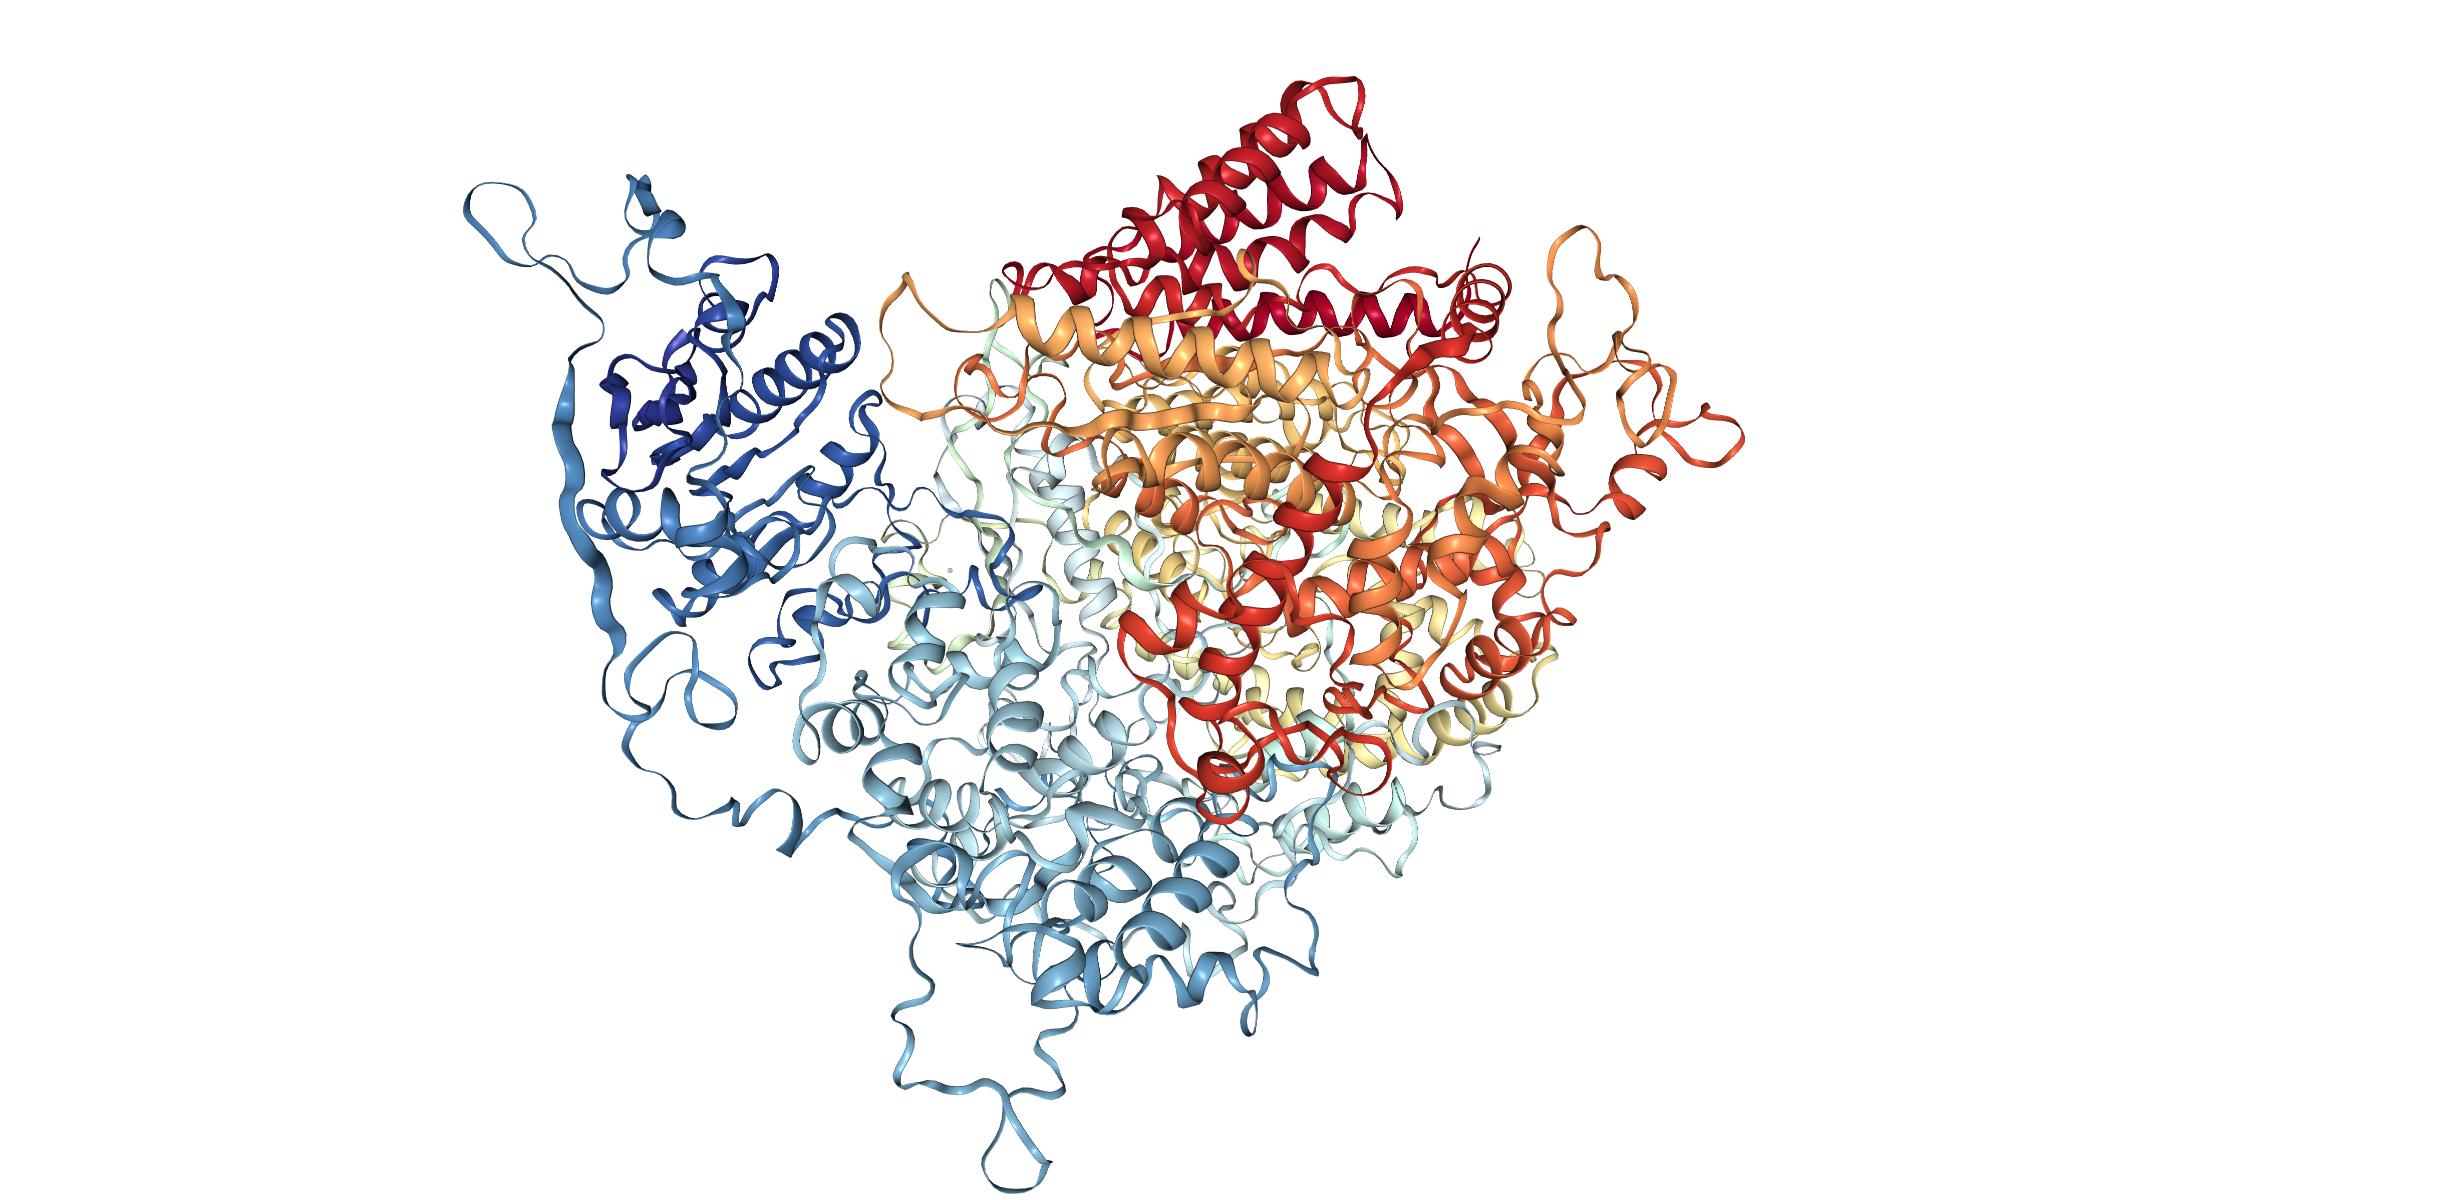

In [62]:
#need this in order to actually print the structure in an output that can be viewed when the notebook is downloaded
view._display_image()